## Setting the goal

The model built for homework 4 an accuracy of 81.4%, which was 0.3% over the most common baseline. I will be using more data for homework 5. I also have no way of guaranteeing I end up with the same random sample of data (taking a random split of the sample is something I have learned not to do for this very reason in this class) as I had in homework 4 to compare exactly how this model performs.

##### Results
This model ended up 5.44% over the most common baseline by one measure and 5.61% by another. This beats the 5.33% needed to make a 5% improvement to the model, relative to he most common baseline, but represents a failure to improve the raw accuracy score of the model overall. A paper detailing my failure coresides in this repository.

## Documentation - Ideas tried and their results

### More data
The basic solution to data science problems - more data. I collected a decade of weather data for Boise instead of just 4 years. More data should help cope with problems created by engineering new features. I will explore if 10 years is too far back and subtle climate changes make the earliest years in the data set a worse predictor of rain tomorrow. Climate change tends to be slow so I doubt this will be too much of a problem.

##### Results
Just using more data did not have any impact on the model from homework 4. Simply training a logistic regression classifier on the cleaned data resulted in predictions on par with predicting the common baseline. I included more data however because I planned to include a number of new features and I know this is one of the steps needed to combat the curse of dimensionality in data science and machine learning.

### Data from other geographic locations
I gathered data from 3 more cities. Portland and Bend Oregon along with Seattle, Washington. The idea is to see if rain and/or windspeed in any of these cities today/yesterday indicates higher probability of rain in Boise tomorrow.

##### Results
The data for Bend was extremely empty and there ended up being nothing to work with. The data for Portland and Seattle ended up having a positive impact on the model after some feature engineering as listed below. I initally only planned to have wind direction and precipitaion available for these cities, but experimented with adding and removing various features from their weather data. In the end I found that the weather in those cities today is highly correlated with the weather in Boise tomorrow. Today's wind direction, today's precipitation combined with historical (yesterday and two days past) precipitation, today's wind speed, and today's barometric pressure seemed to be the combination of columns that contributed the most to the accuracy score. The model did not respond or even performed worse when including historical wind speed/direction data, temperature data, dewpoint data, etc. I hypothesize this is because wind speed and direction, barometric pressure, and precipitation today directly impact the weather in Boise tomorrow. The historical precipitation likely had a small impact because it shows if the storm that is affecting the respective city is large enough to make in inland to Boise. The other columns such as temperature, that caused accuracy to decrease likely had little to do with Boise's future weather, and simply added noise. Overall these additional columns added roughly 2.5% to the accuracy over the baseline. This increase of course includes the binning on some of these features for the additional data as described below.

### Feature engineering - changes in temperature and barometric pressure.
Instead of just looking at temps and barometric pressure I want to look at the changes in these values. I read that barometric pressure drops indicate increased likelihood of storms, so I want to create a feature for my data set to exploit this instead of just looking at the raw number. I want to explore if a similar fact about temperature exists.

##### Results

Adding a one day change in barometric pressure helped to improve the barometric pressure. Adding a two day changed helped further. Initially, once I had the columns that included these changes, I dropped the historical barometric pressure. This actually reduced the accuracy and the model seemed to perform best with all categories included.

For temperature, adding a two day historical record helped the model. Adding columns that showed a one and two day change also helped the model, but the model's performance was the best when it only included the temperature one and two days ago for each row. Adding the change columns on top of or in place of these caused the increase in accuracy to be less significant.

I got about a 0.8% increase in the accuracy over the most common baseline with these steps.

### Binning time data into seasons
Last time I discarded the date, and that was foolish. It is more likely to rain in Boise in non-summer seasons. I want to bin the dates into seasons and one-hot encode them so that my model can exploit this fact.

##### Results
Binning the data (and one-hot encoding it) into seasons caused a nice improvement in the model. I decided to take this one step further and bin the dates into months and try that as well. The model improved more with just the months added. I took it one step further and decided to see how it behaved with both seasons and months added as features from the time column, and this was the most successful combination. Something about this combination maintained enough uniqueness between the features to carry useful information for the model.

##### Bonus - binning wind direction
I though about what we had talked about in class with features that are "circular" such as dates or compass directions. I realized that the wind direction was having an impact and decided to try binning this information to see if the model could glean more accuracy out of it by taking into account the fact that 359 degrees and 1 degree are actually very closely related. 

At first I tried a simple binning with the four basic cardinal directions. This did in fact improve the model. I wanted to see if more specificity in this binning would help or hurt, so I tried binning it into eight directions (North, Northeast, East, Southeast, etc). My finding was that the increased specificity in binning the wind direction for both Boise today and Portland and Seattle historically. After I binned the dates I one-hot encoded them, to allow the model to utilize the bins.

Between binning the dates and binning the wind direction I got another 0.7% accuracy or so over the most common baseline.

### Scaling
I will scale all numerical data here as discussed in class.

##### Results
I explored the distributions of many of the data points and found them to be mostly normal. I first tried a standard scaler, to preserve the negative values of some features (such as change in pressure). This actually caused my accuracy to go down. I did some exploring and found it was likely because some of my features weren't quite normally distributed enough to be standardized in this way. I did some research and found the QuanitleTransformer was likely my best fit. I'm semi-familiar with how it works from my Data Analysis class. Scaling the data in this way netted me the largest increase of any single action at a 0.8%.

### Feature Dropping

I experimented with dropping many features and found that most feature dropping hurt my model with the exception of dropping Daily Departure from Normal Average. It was the least useful feature in homework 4 and dropping it here must have cut some noise out because my model actually improved by 0.15% by removing it.


### K-folds cross-validation
I will utilize stratified k-folds cross-validation to help balance my relatively imbalanced classes and get a better picture of what the accuracy might look like across several combinations of test train splits

##### Results
I first tried stratified k-folds validation to try to equalize my somewhat imbalanced classes. The accuracy of the model under this method of verification was about a 0.5% lower than just using k-folds (depending on the folds picked). I decided to use 35 folds on the k-folds since that equated to each fold containing about 100 samples. This netted the accuracy of 80.25% - squeaking me in over the 80.14% accuracy I needed to improve my model to 5.3% over the most common baseline instead of just 0.3%.

Once I had completed the steps above, I tried leave one out cross validation and my accuracy actually ended up higher at 80.42%, although I wouldn't reccommend this as a regular practice as it takes forever. These methods of validation make up the trace differences in my accuracy score improvement not already listed. 

### Overall thoughts
This assignment ended up being MUCH more exploratory and trickier than I thought. I gained a real appreciation for the nuance in data science and can clearly see how important being able to engineer features is. I can now see that engineering features that matter is also going to take a lot of practice and domain expertise. Applying the machine learning algorithm was actually the easiest part of all this. 

At the end, I'm not terribly happy with my model. It meets the stated goal, but for as much effort as I put into it, I still don't think it is very good. I think if I had many more hours to spend and put some thought into it I could find other data points and engineer better features to move it even further along. I also think there probably exists some level of noise I could cut out. It really would just take thinking, trying and testing until I found something. I learned a lot by doing this homework and it really helped bring a lot of the concepts we've been talking about, such as model evaluation, feature engineering, etc. together for me. I can see how knowing the machine learning algorithm and using it is the easiest part now. The hard part is getting data and features that don't suck so the model can actually be good.

In [1]:
##import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold


In [2]:
def import_and_clean_data():
    ##import all data sets
    #Data courtesy of NOAA: https://www.ncei.noaa.gov/cdo-web/datasets
    cols = ['DATE', 'REPORT_TYPE','DailyAverageRelativeHumidity', 'DailyAverageSeaLevelPressure',
        'DailyAverageWindSpeed', 'DailySustainedWindDirection',
       'DailyPrecipitation', 'DailySnowfall', 'DailyAverageDryBulbTemperature',
        'DailyAverageDewPointTemperature']
    ocols = ["DATE","REPORT_TYPE","DailyPrecipitation", "DailySustainedWindDirection","DailyAverageWindSpeed",
            'DailyAverageSeaLevelPressure']
    df_boise = pd.read_csv("boise.csv", usecols = cols, parse_dates = ['DATE'])
    df_seattle = pd.read_csv("seattle.csv", usecols = ocols, parse_dates = ['DATE'])
    df_portland = pd.read_csv("portland.csv", usecols = ocols, parse_dates = ['DATE'])

    ## Only retain summary of day data and not hourly
    df_boise = df_boise[df_boise["REPORT_TYPE"].str.contains('SOD')]
    df_seattle = df_seattle[df_seattle["REPORT_TYPE"].str.contains('SOD')]
    df_portland = df_portland[df_portland["REPORT_TYPE"].str.contains('SOD')]
    
    #Trace amounts of snow equates to =< 1/100 of an inch, so we will replace it with .01
    df_boise.loc[df_boise['DailySnowfall'] == 'T', "DailySnowfall"] = .01
    df_boise.loc[df_boise['DailyPrecipitation'] == 'T', "DailyPrecipitation"] = .01
    df_seattle.loc[df_seattle['DailyPrecipitation'] == 'T', "DailyPrecipitation"] = .01
    df_portland.loc[df_portland['DailyPrecipitation'] == 'T', "DailyPrecipitation"] = .01

    #drop report column as we are done with that
    df_boise = df_boise.drop(labels = ['REPORT_TYPE'], axis=1)
    df_seattle.drop(labels = ['REPORT_TYPE'], axis=1, inplace=True)
    df_portland.drop(labels = ['REPORT_TYPE'], axis=1, inplace=True)
    
    for col in df_boise:
        #Convert all numeric dtypes to numeric, NAN on error
        if col != "DATE":
            df_boise[col] = pd.to_numeric(df_boise[col], errors='coerce')
    for col in df_seattle:
        #Convert all numeric dtypes to numeric, NAN on error
        if col != "DATE":
            df_seattle[col] = pd.to_numeric(df_seattle[col], errors='coerce')
    for col in df_portland:
        #Convert all numeric dtypes to numeric, NAN on error
        if col != "DATE":
            df_portland[col] = pd.to_numeric(df_portland[col], errors='coerce')
            
    #rename the columns I will be keeping for the join that is coming up
    df_seattle = df_seattle.rename(columns={"DailyAverageWindSpeed" : 'SeattleAvgWindSpeed',
                                            "DailySustainedWindDirection" : "SeattleWindDirection",
                                       "DailyPrecipitation" : "SeattleDailyPrecipitation",
                                           'DailyAverageSeaLevelPressure' : 'SeattleDailyAverageSeaLevelPressure'})
    df_portland = df_portland.rename(columns={"DailyAverageWindSpeed" : 'PortlandAvgWindSpeed',
                                              "DailySustainedWindDirection" : "PortlandWindDirection",
                                         "DailyPrecipitation" : "PortlandDailyPrecipitation",
                                             'DailyAverageSeaLevelPressure' : 'PortlandDailyAverageSeaLevelPressure'})
    #For some reason this data had 9/29 included, which had absolutely no data input, so we are dropping it
    df_portland = df_portland.drop(df_portland.index[-1])
    
    df_all = df_boise.merge(df_portland, on='DATE')
    df_all = df_all.merge(df_seattle, on='DATE')
    
    #Shift the rain for portland by 2 days
    df_all['PortlandRainYesterday'] = df_all['PortlandDailyPrecipitation'].shift(1)
    df_all['PortlandRainTwoDaysPast'] = df_all['PortlandDailyPrecipitation'].shift(2)
    df_all['SeattleRainYesterday'] = df_all['SeattleDailyPrecipitation'].shift(1)
    df_all['SeattleRainTwoDaysPast'] = df_all['SeattleDailyPrecipitation'].shift(2)
    
    #add label column, for an explanation on how we are differentiating snow from rain, see hw 4
    df_all['rain_today'] = np.where((df_all['DailyPrecipitation'] > 0) & (df_all['DailyPrecipitation'] > df_all['DailySnowfall']), 1, 0)
    df_all['RainTomorrow'] = df_all['rain_today'].shift(-1)
    df_all = df_all.drop(labels=['DailySnowfall', 'DailyPrecipitation', 'rain_today'], axis=1)
    
    #add column to compute changes in bar pressure and change in temp
    df_all['BarometricPressureYesterday'] = df_all['DailyAverageSeaLevelPressure'].shift(1)
    df_all['BarometricPressureTwoDaysPast'] = df_all['DailyAverageSeaLevelPressure'].shift(2)
    df_all['AvgTempYesterday'] = df_all['DailyAverageDryBulbTemperature'].shift(1)
    df_all['AvgTempTwoDaysPast'] = df_all['DailyAverageDryBulbTemperature'].shift(2)
    df_all['DailyAverageDewPointTemperatureYesterday'] = df_all['DailyAverageDewPointTemperature'].shift(1)
    df_all['DailyAverageDewPointTemperatureTwoDaysPast'] = df_all['DailyAverageDewPointTemperature'].shift(2)
    df_all['AvgRelativeHumidityYesterday'] = df_all['DailyAverageRelativeHumidity'].shift(1)
    df_all['HumidityChange'] = df_all['DailyAverageRelativeHumidity'] -  df_all['AvgRelativeHumidityYesterday']
    df_all = df_all.drop(labels=['AvgRelativeHumidityYesterday','DailyAverageRelativeHumidity'], axis=1)
    
    #here I make the decision to drop NA rows. Why drop instead of impute?
    #1) The vast majority of rows containing NA's are rows for the last 2 months that contain no
    #Data at all for two features including the most important feature from homework 4 - Barometric pressure.
    # I am not sure how to impute 2 consecutive months of weather data, especially on one of the most impactful features.
    #2) The other two rows are the result of our shift, this is unavoidable with the features I'm adding. No other real
    # data is lost in this process via converting to numerical data, etc.
    df_all = df_all.dropna(how='any')
    
    return df_all

In [3]:
df_all = import_and_clean_data()

C:\Users\Zade\AppData\Local\Temp\ipykernel_5932\73652553.py:10: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_boise = pd.read_csv("boise.csv", usecols = cols, parse_dates = ['DATE'])


In [4]:
#function to bin the date
def date_binner(df_row):
    year = df_row.year
    spring_early_bound = np.datetime64(str(year) + '-03-20')
    spring_later_bound = np.datetime64(str(year) + '-06-20')
    summer_later_bound = np.datetime64(str(year) + '-09-20')
    fall_later_bound = np.datetime64(str(year) + '-12-20')
    if df_row < spring_early_bound or df_row >= fall_later_bound:
        return 'winter'
    if df_row >= spring_early_bound and df_row < spring_later_bound:
        return 'spring'
    if df_row >= spring_later_bound and df_row < summer_later_bound:
        return 'summer'
    if df_row >= summer_later_bound and df_row < fall_later_bound:
        return 'fall'
    
#function to bin the wind direction
def wind_dir_binner(df_row):
    if df_row > 337 or df_row <= 23:
        return 'N'
    if df_row > 23 and df_row <= 68:
        return 'NE'
    if df_row > 68 and df_row <= 113:
        return 'E'
    if df_row > 113 and df_row <= 158:
        return 'SE'
    if df_row > 158 and df_row <= 203:
        return 'S'
    if df_row > 203 and df_row <= 248:
        return 'SW'
    if df_row > 248 and df_row <= 293:
        return 'W'
    if df_row > 293 and df_row <= 337:
        return 'NW'

#function to bin wind direction with fewer cardinals
def wind_dir_binner_simple(df_row):
    if df_row > 315 or df_row <= 45:
        return 'N'
    if df_row > 45 and df_row <= 135:
        return 'W'
    if df_row > 135 and df_row <= 225:
        return 'S'
    if df_row > 225 and df_row <= 315:
        return 'E'
    
#function bin the date by month
def date_binner_month(df_row):
    if df_row.month == 1:
        return 'jan'
    if df_row.month == 2:
        return 'feb'
    if df_row.month == 3:
        return 'march'
    if df_row.month == 4:
        return 'april'
    if df_row.month == 5:
        return 'may'
    if df_row.month == 6:
        return 'june'
    if df_row.month == 7:
        return 'july'
    if df_row.month == 8:
        return 'aug'
    if df_row.month == 9:
        return 'sept'
    if df_row.month == 10:
        return 'oct'
    if df_row.month == 11:
        return 'nov'
    if df_row.month == 12:
        return 'dec'

In [5]:
#This actually worked on the first try and that literally never happens to me so I was pretty stoked
df_all['Month'] = df_all['DATE'].apply(date_binner_month)
df_all['Season'] = df_all['DATE'].apply(date_binner)
df_all['DailySustainedWindDirection'] = df_all['DailySustainedWindDirection'].apply(wind_dir_binner)
df_all['PortlandWindDirection'] = df_all['PortlandWindDirection'].apply(wind_dir_binner)
df_all['SeattleWindDirection'] = df_all['SeattleWindDirection'].apply(wind_dir_binner)

In [6]:
#Compute changes in barometric pressure
df_all['OneDayPressureChange'] = df_all['DailyAverageSeaLevelPressure'] - df_all['BarometricPressureYesterday']
df_all['TwoDayPressureChange'] = df_all['DailyAverageSeaLevelPressure'] - df_all['BarometricPressureTwoDaysPast']

#drop the now used columns
df_all = df_all.drop(labels=['BarometricPressureYesterday', 'BarometricPressureTwoDaysPast'], axis=1)

In [7]:
#convert our binned categories to one hot encodings
dummies_to_get = ['Season', 'DailySustainedWindDirection', 'SeattleWindDirection', 'PortlandWindDirection', 'Month']
dummies = pd.get_dummies(df_all[dummies_to_get])
df_all = df_all.drop(labels=dummies_to_get, axis=1)#drop the columns the dummies came from
df_all = df_all.join(dummies)
df_all = df_all.drop('DATE',axis=1)
df_all

,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageSeaLevelPressure,DailyAverageWindSpeed,PortlandDailyAverageSeaLevelPressure,PortlandAvgWindSpeed,PortlandDailyPrecipitation,SeattleDailyAverageSeaLevelPressure,SeattleAvgWindSpeed,SeattleDailyPrecipitation,...,Month_dec,Month_feb,Month_jan,Month_july,Month_june,Month_march,Month_may,Month_nov,Month_oct,Month_sept
2,16.0,54.0,30.12,11.8,30.21,15.2,0.0,30.33,16.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,19.0,51.0,30.16,6.9,30.17,10.7,0.0,30.28,14.5,0.0,...,0,0,0,0,0,0,0,0,1,0
4,19.0,47.0,30.22,3.6,30.17,12.7,0.0,30.27,12.7,0.0,...,0,0,0,0,0,0,0,0,1,0
5,18.0,49.0,30.22,7.2,30.11,10.7,0.0,30.19,11.5,0.0,...,0,0,0,0,0,0,0,0,1,0
6,18.0,52.0,30.13,5.4,29.98,3.9,0.0,30.03,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,46.0,86.0,29.83,8.0,29.95,5.2,0.0,29.99,6.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3587,48.0,87.0,29.81,6.5,29.90,5.0,0.0,29.96,5.9,0.0,...,0,0,0,1,0,0,0,0,0,0
3588,43.0,87.0,29.82,7.3,29.84,5.2,0.0,29.90,5.6,0.0,...,0,0,0,1,0,0,0,0,0,0
3589,40.0,87.0,29.85,6.6,29.83,6.8,0.0,29.90,5.5,0.0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
#Get a list of columns so I can avoid normalizing my categoricals, not that it makes a difference
df_all.columns

Index(['DailyAverageDewPointTemperature', 'DailyAverageDryBulbTemperature',
       'DailyAverageSeaLevelPressure', 'DailyAverageWindSpeed',
       'PortlandDailyAverageSeaLevelPressure', 'PortlandAvgWindSpeed',
       'PortlandDailyPrecipitation', 'SeattleDailyAverageSeaLevelPressure',
       'SeattleAvgWindSpeed', 'SeattleDailyPrecipitation',
       'PortlandRainYesterday', 'PortlandRainTwoDaysPast',
       'SeattleRainYesterday', 'SeattleRainTwoDaysPast', 'RainTomorrow',
       'AvgTempYesterday', 'AvgTempTwoDaysPast',
       'DailyAverageDewPointTemperatureYesterday',
       'DailyAverageDewPointTemperatureTwoDaysPast', 'HumidityChange',
       'OneDayPressureChange', 'TwoDayPressureChange', 'Season_fall',
       'Season_spring', 'Season_summer', 'Season_winter',
       'DailySustainedWindDirection_E', 'DailySustainedWindDirection_N',
       'DailySustainedWindDirection_NE', 'DailySustainedWindDirection_NW',
       'DailySustainedWindDirection_S', 'DailySustainedWindDirection_SE',
 

In [9]:
#Scale the data
scaler = QuantileTransformer()
columns = df_all.columns.tolist()
columns_not_to_scale = ['Season_fall',
       'Season_spring', 'Season_summer', 'Season_winter',
       'DailySustainedWindDirection_E', 'DailySustainedWindDirection_N',
       'DailySustainedWindDirection_NE', 'DailySustainedWindDirection_NW',
       'DailySustainedWindDirection_S', 'DailySustainedWindDirection_SE',
       'DailySustainedWindDirection_SW', 'DailySustainedWindDirection_W',
       'SeattleWindDirection_E', 'SeattleWindDirection_N',
       'SeattleWindDirection_NE', 'SeattleWindDirection_NW',
       'SeattleWindDirection_S', 'SeattleWindDirection_SE',
       'SeattleWindDirection_SW', 'SeattleWindDirection_W',
       'PortlandWindDirection_E', 'PortlandWindDirection_N',
       'PortlandWindDirection_NE', 'PortlandWindDirection_NW',
       'PortlandWindDirection_S', 'PortlandWindDirection_SE',
       'PortlandWindDirection_SW', 'PortlandWindDirection_W', 'Month_april',
       'Month_aug', 'Month_dec', 'Month_feb', 'Month_jan', 'Month_july',
       'Month_june', 'Month_march', 'Month_may', 'Month_nov', 'Month_oct',
       'Month_sept']
columns_to_scale = [item for item in columns if item not in columns_not_to_scale]


#create new df with appropriate column names
df_2 = pd.DataFrame(scaler.fit_transform(df_all[columns_to_scale]), columns=columns_to_scale)

In [10]:
#loop through scaled column names and reassign old values in our dataframe to the scaled values
for column in columns_to_scale:
    df_all[column] = df_2[column].values

In [11]:
#Get set of features and label
features = df_all.columns.tolist()
features.remove('RainTomorrow')
test = df_all.sample(frac=0.30, random_state=500)
train = df_all[~df_all.index.isin(test.index)]
x_test = test[features]
y_test = test['RainTomorrow']
x_train = train[features]
y_train = train['RainTomorrow']

In [12]:
# I am only building this model to look at the coefficients it is producing
# I used this process of examining coefficients to help determine which things I could remove
# Or to help see which features were most useful and that I could potentially get more info from.
model = LogisticRegression(max_iter=5000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

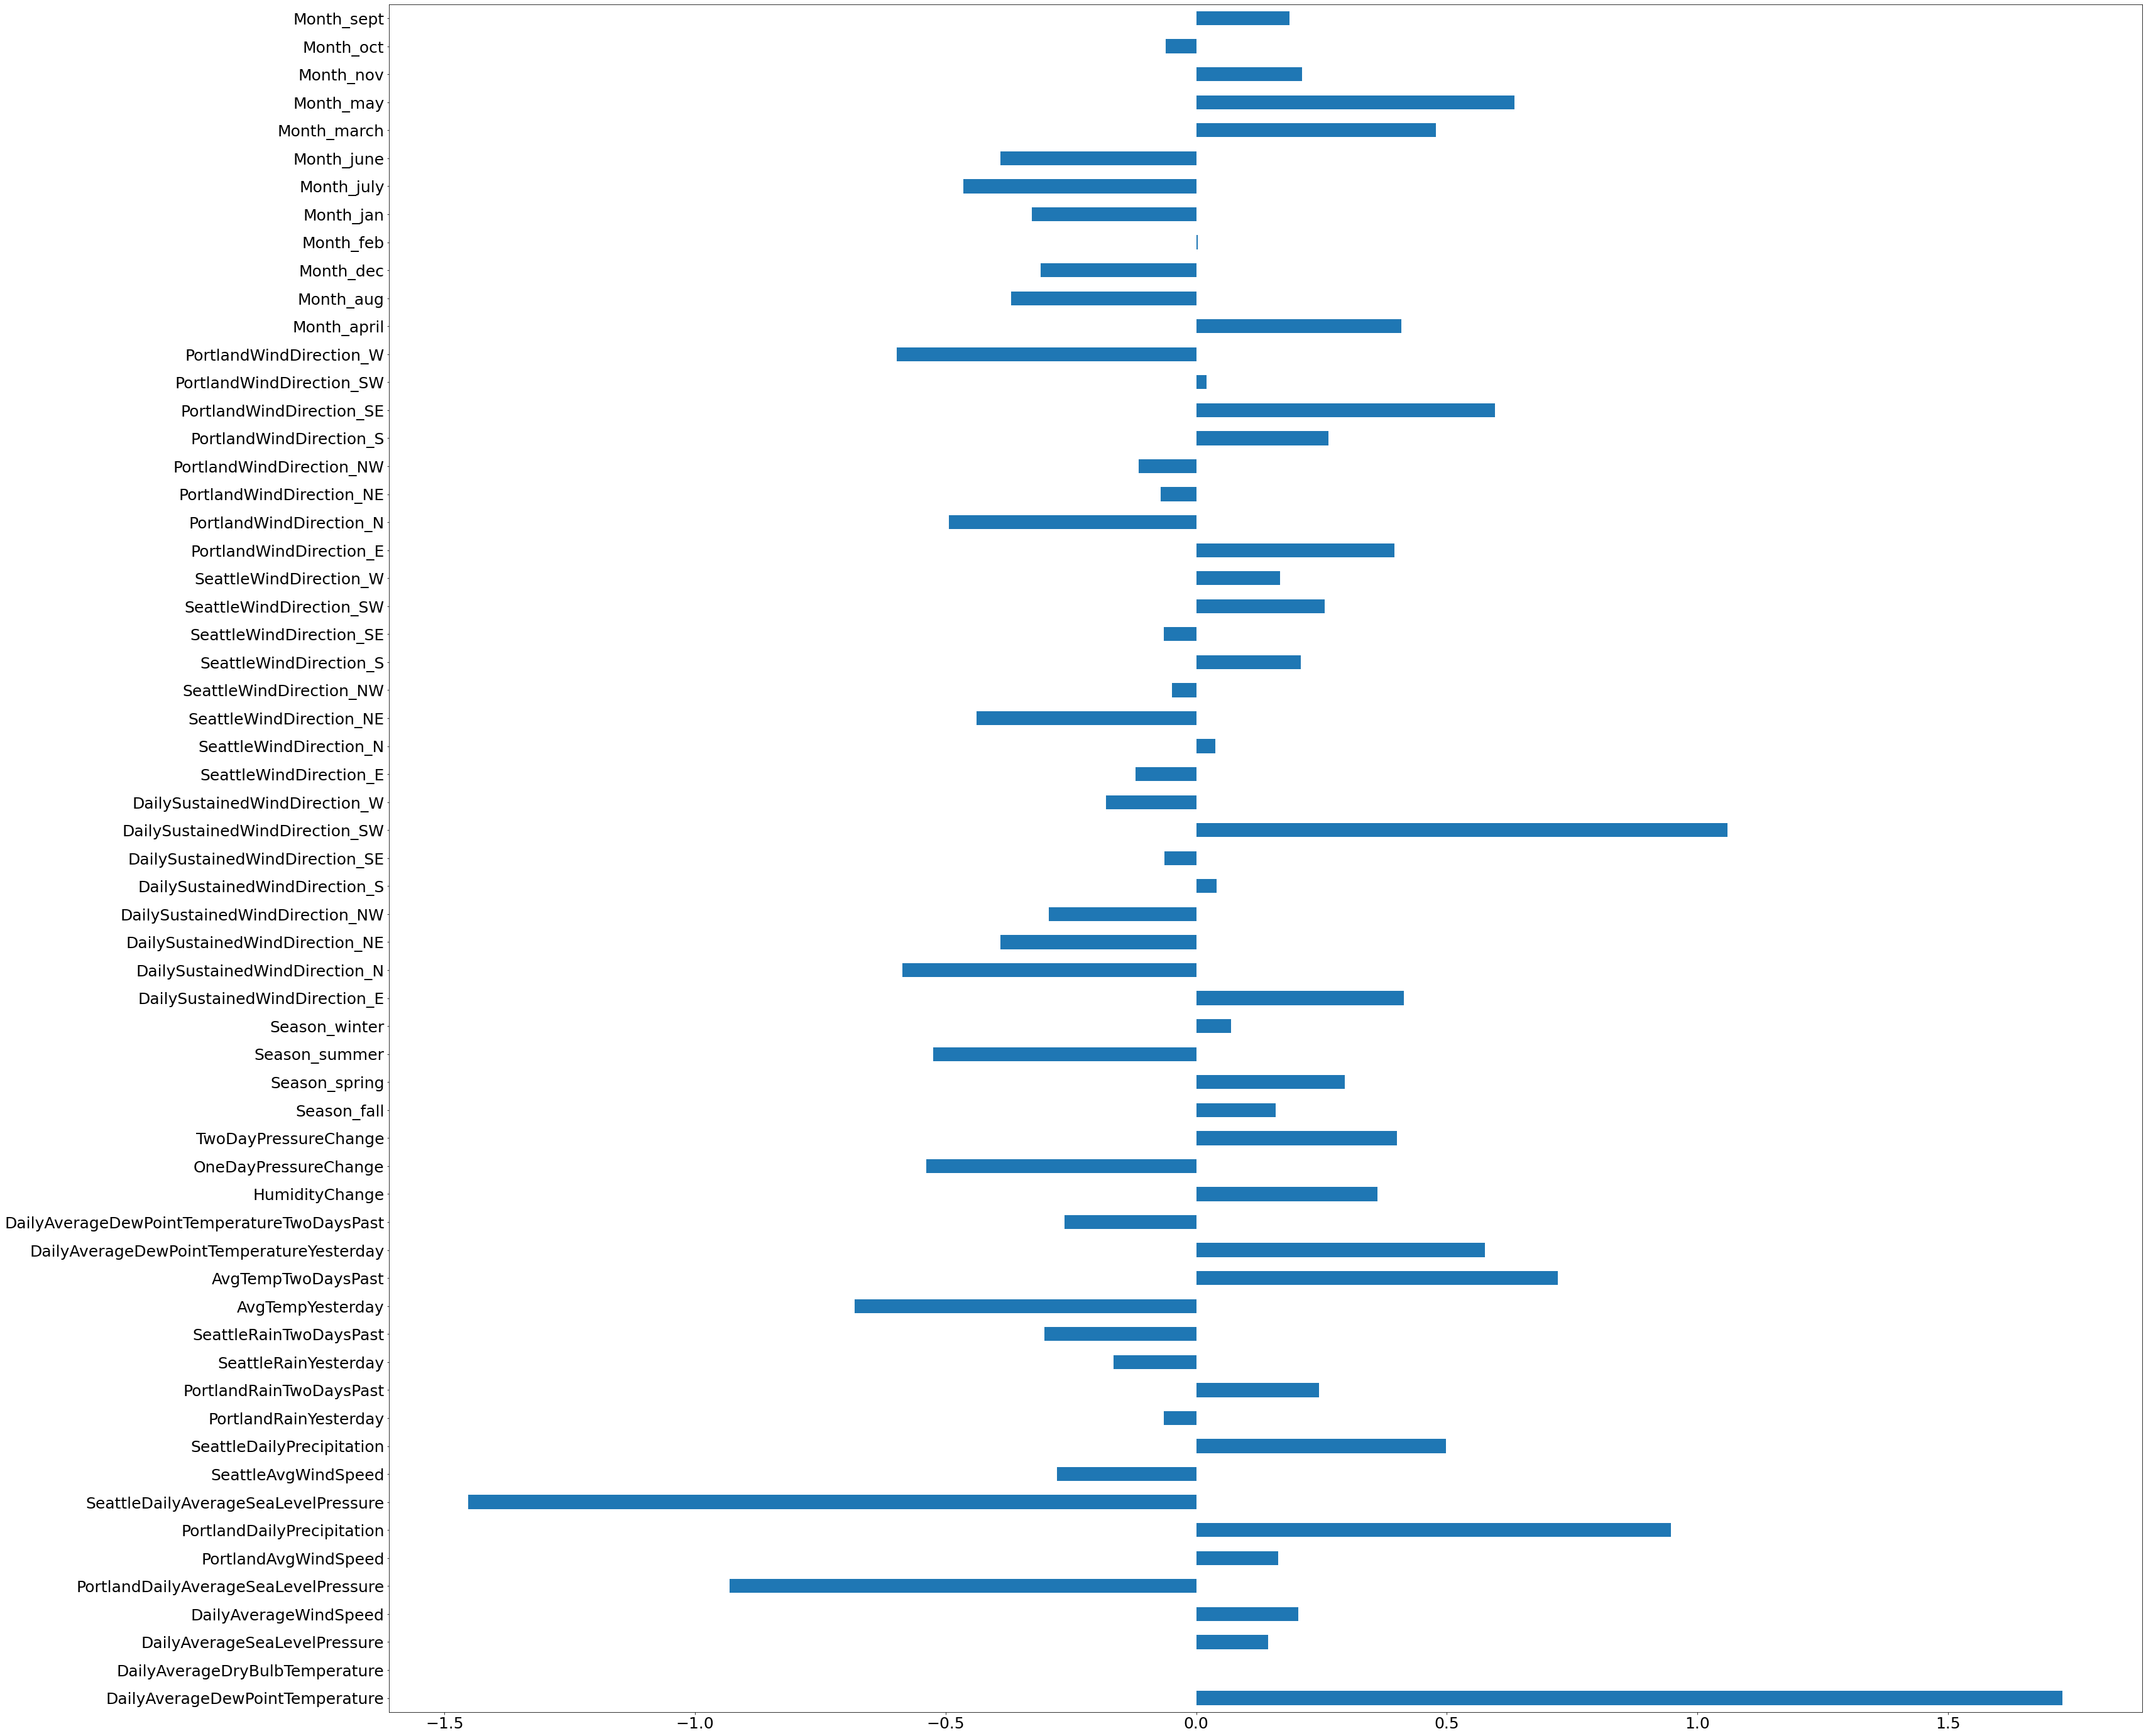

In [13]:
#just to sees what the model coeffs are
model_coeffs = pd.Series(model.coef_.flatten(),index=features).plot(kind='barh',figsize=(50,50),fontsize=25)

In [14]:
# evaluate our model with k-folds, roughly 100 samples per fold here
x = df_all[features]
y = df_all['RainTomorrow']
kfold = KFold(n_splits=35)
model = LogisticRegression(max_iter=5000)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Accuracy: %.2f%%" % (results.mean()*100.0))

Accuracy: 80.25%


In [15]:
#Because I hate my pc I guess (I don't actually hate you PC)
loo = LeaveOneOut()
model = LogisticRegression(max_iter=5000)
results = model_selection.cross_val_score(model, x, y, cv=loo)
print("Accuracy: %.2f%%" % (results.mean()*100.0))

Accuracy: 80.42%


In [16]:
#Calculate the most common baseline
proportion_rainy_days = (len(df_all[df_all['RainTomorrow'] == 1]) / len(df_all))*100
print('Actual proportion of rainy days: %.2f%%' % proportion_rainy_days)
print('Actual proportion of nonrainy days: %.2f%%' % (100 - proportion_rainy_days))

Actual proportion of rainy days: 25.19%
Actual proportion of nonrainy days: 74.81%


### Results
I have about 5.44 - 5.61% improvement over the most common baseline, barely squeaking above out stated goal of 5.33%